<a href="https://colab.research.google.com/github/gouthamreddy94/Masters_Project_2023/blob/main/Copy_of_NLP_sentiment_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# final

In [ ]:
!pip install deep-translator langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=578b943fbda98646380942f7177c52bb0db08cb3f3eba0b5463deea00ef1f718
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import requests
import pandas as pd
import numpy as np
from deep_translator import GoogleTranslator

In [ ]:
# Bearer token
bearer_token = "AAAAAAAAAAAAAAAAAAAAAN%2FjpQEAAAAAus11r5YS4gb0yAnuNJUsKKai8fY%3D63qLYnYjt2Mwdq0FTth1dosVoYbXDcvt4rzNxfuMIjIJzKPl7g"

# URL for recent search
search_url = "https://api.twitter.com/2/tweets/search/recent"

# Headers for GET request
headers = {
    "Authorization": f"Bearer {bearer_token}"
}

In [ ]:
# Parameters for the search query
params = {
    "query": "FIFA",
    "max_results": 100
}

# Send GET request to Twitter API
response = requests.get(search_url, headers=headers, params=params)

In [ ]:
# Check if the request was successful
if response.status_code == 200:
    # Extract the tweets from the response
    tweets = response.json()["data"]

    # Create a DataFrame to store the tweet data
    df = pd.DataFrame(tweets)

    # Save the DataFrame to a CSV file for further use
    df.to_csv("tweets.csv", index=False)

    print("Data saved successfully.")
else:
    print("Error occurred while making the request.")


Data saved successfully.


In [ ]:
df.head(10)

,edit_history_tweet_ids,id,text
0,[1697211079225475088],1697211079225475088,"The maiden release of EA Sports' biggest video game since the FIFA rebrand is just weeks away. There is huge excitement across the community, with huge upgrades set to arrive in all areas of the game."
1,[1697211057826058442],1697211057826058442,RT @SpeedUpdates1: speed really thought he packed himself on FIFA 😭 https://t.co/Q5pd3U06vv
2,[1697211037387239624],1697211037387239624,RT @matheuslaneri: Rapaziada o que estão fazendo com o Vasco é um caso claro de cachorrada. O clube tem que ir pra FIFA e paralisar o Brasi…
3,[1697211034862280729],1697211034862280729,"RT @u_arroba: – Se cae mi wela de 90 años porque le falla el andador y pide que la levante, ¿me echo una partida al FIFA o al PRO? https://…"
4,[1697211027446779999],1697211027446779999,"RT @kinatux: When Stonebwoy got the opportunity to perform at the FIFA World cup fan festival, he dedicated 30 minutes for Ghana music to p…"
5,[1697211022506135723],1697211022506135723,@Nu_no_tukaite 21時には家着くのでリハビリFIFAお願いします
6,[1697211021255971237],1697211021255971237,"RT @ArobaseGiovanny: Le président de la FIFA qui va voir un match de l'Inter Miami 🙄🙄🙄\n\nBizarre, on l'attend à un match d'Al-Nassr maintena…"
7,[1697211003400782110],1697211003400782110,"esse teste podia ser menos longo. ali pelo 35º eu desisti (sério, não acaba nunca. fiquei com medo de ter que identificar todos os 200 e poucos países da ONU. ou da FIFA, que tem mais países que a ONU) https://t.co/phITQ48d3k"
8,[1697211003270733933],1697211003270733933,RT @arielipillo: 👀🚨 EL PRESIDENTE DE LA FIFA VIAJO DE ZURICH A MIAMI PARA VER AL INTER\n\nYa entienden porque decimos lo que decimos! 🤣🤣🤣🤣🤣…
9,[1697210990226493605],1697210990226493605,"RT @PeterSellei: Fascinerande, detaljrik läsning om hur Qatar mutade 14 medlemmar av FIFA:s verkställande utskott för att få fotbolls-VM. S…"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   edit_history_tweet_ids  100 non-null    object
 1   id                      100 non-null    object
 2   text                    100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [ ]:
!pip install langdetect

In [ ]:
import pandas as pd
from langdetect import detect

def identify_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"
# Add a new column to the dataframe for the detected language
df['language'] = df['text'].apply(identify_language)

# Filter out English texts
non_english_df = df[df['language'] != 'en'][['text', 'language']]  # Just selecting 'text' and 'language' columns

print(non_english_df)


                                                                                                                                                                                                                                                                                                             text  \
2   RT @matheuslaneri: Rapaziada o que estão fazendo com o Vasco é um caso claro de cachorrada. O clube tem que ir pra FIFA e paralisar o Brasi…                                                                                                                                                                    
3   RT @u_arroba: – Se cae mi wela de 90 años porque le falla el andador y pide que la levante, ¿me echo una partida al FIFA o al PRO? https://…                                                                                                                                                                    
5   @Nu_no_tukaite 21時には家着くのでリハビリFIFAお願いします                              

In [ ]:
unique_non_english_languages = non_english_df['language'].unique()

print(unique_non_english_languages)


['pt' 'es' 'ja' 'fr' 'sv' 'it' 'sw' 'id' 'fi' 'de' 'nl' 'tr']


In [ ]:
# Import libraries for sentiment analysis
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df['text'] = df['text'].str.replace('@[\w]+', '', regex=True)


In [ ]:
df.head(10)

,edit_history_tweet_ids,id,text,language
0,[1697211079225475088],1697211079225475088,"The maiden release of EA Sports' biggest video game since the FIFA rebrand is just weeks away. There is huge excitement across the community, with huge upgrades set to arrive in all areas of the game.",en
1,[1697211057826058442],1697211057826058442,RT : speed really thought he packed himself on FIFA 😭 https://t.co/Q5pd3U06vv,en
2,[1697211037387239624],1697211037387239624,RT : Rapaziada o que estão fazendo com o Vasco é um caso claro de cachorrada. O clube tem que ir pra FIFA e paralisar o Brasi…,pt
3,[1697211034862280729],1697211034862280729,"RT : – Se cae mi wela de 90 años porque le falla el andador y pide que la levante, ¿me echo una partida al FIFA o al PRO? https://…",es
4,[1697211027446779999],1697211027446779999,"RT : When Stonebwoy got the opportunity to perform at the FIFA World cup fan festival, he dedicated 30 minutes for Ghana music to p…",en
5,[1697211022506135723],1697211022506135723,21時には家着くのでリハビリFIFAお願いします,ja
6,[1697211021255971237],1697211021255971237,"RT : Le président de la FIFA qui va voir un match de l'Inter Miami 🙄🙄🙄\n\nBizarre, on l'attend à un match d'Al-Nassr maintena…",fr
7,[1697211003400782110],1697211003400782110,"esse teste podia ser menos longo. ali pelo 35º eu desisti (sério, não acaba nunca. fiquei com medo de ter que identificar todos os 200 e poucos países da ONU. ou da FIFA, que tem mais países que a ONU) https://t.co/phITQ48d3k",pt
8,[1697211003270733933],1697211003270733933,RT : 👀🚨 EL PRESIDENTE DE LA FIFA VIAJO DE ZURICH A MIAMI PARA VER AL INTER\n\nYa entienden porque decimos lo que decimos! 🤣🤣🤣🤣🤣…,es
9,[1697210990226493605],1697210990226493605,"RT : Fascinerande, detaljrik läsning om hur Qatar mutade 14 medlemmar av FIFA:s verkställande utskott för att få fotbolls-VM. S…",sv


In [ ]:
# lower case and removing emojis and special Character
lowerCaseTweets = list(map(lambda x:x.lower(), df['text']))
df['text'] = [re.sub(r"[^a-zA-Z0-9 ]", "", i) for i in lowerCaseTweets]

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import pandas as pd

wNLTR = WordNetLemmatizer()
pStemr = PorterStemmer()
stop_words_set = set(stopwords.words('english'))

def CleaningData(lineTweet):
    lineTweet = str(lineTweet)
    lineTweet = lineTweet.lower()

    # Remove 'rt' from the beginning of the sentence
    lineTweet = lineTweet.replace('rt', '', 1)

    # Replace various substrings
    replacements = ['{html}', '{https}', '{amp}']
    for r in replacements:
        lineTweet = lineTweet.replace(r, "")

    # Remove HTML tags
    cleaner = re.compile('<.*?>')
    cleanText = re.sub(cleaner, '', lineTweet)

    # Remove URLs
    cleanText = re.sub(r'http\S+', '', cleanText)

    # Remove 'htt' and any related text
    cleanText = re.sub(r'\bhtt\S*|\S*htt\b', '', cleanText)

    # Remove numbers
    cleanText = re.sub('[0-9]+', '', cleanText)

    # Remove mentions
    cleanText = re.sub(r'@\w+', '', cleanText)

    # Remove emojis and other non-textual characters
    cleanText = cleanText.encode('ascii', 'ignore').decode('ascii')

    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(cleanText)

    filteredWords = [i for i in tokens if len(i) > 2 if not i in stop_words_set]
    stemWords = [pStemr.stem(j) for j in filteredWords]
    lemmaWords = [wNLTR.lemmatize(k) for k in stemWords]

    return " ".join(filteredWords)


TweetsClean = df['text'].map(lambda x: CleaningData(x))
# Remove blank records after cleaning
TweetsClean = TweetsClean[TweetsClean != ""]
print(TweetsClean)

0     maiden release spos biggest video game since fifa rebrand weeks away huge excitement across community huge upgrades set arrive areas game                                                                                                                
1     speed really thought packed fifa                                                                                                                                                                                                                         
2     rapaziada que esto fazendo com vasco caso claro cachorrada clube tem que pra fifa paralisar brasi                                                                                                                                                        
3     cae wela aos porque falla andador pide que levante echo una partida fifa pro                                                                                                                                                      

In [ ]:
TweetsClean

0     maiden release spos biggest video game since fifa rebrand weeks away huge excitement across community huge upgrades set arrive areas game                                                                                                                
1     speed really thought packed fifa                                                                                                                                                                                                                         
2     rapaziada que esto fazendo com vasco caso claro cachorrada clube tem que pra fifa paralisar brasi                                                                                                                                                        
3     cae wela aos porque falla andador pide que levante echo una partida fifa pro                                                                                                                                                      

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


<ipython-input-64-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
print(TweetsClean.head())
#print(df_cleaned.info())


0    maiden release spos biggest video game since fifa rebrand weeks away huge excitement across community huge upgrades set arrive areas game
1    speed really thought packed fifa                                                                                                         
2    rapaziada que esto fazendo com vasco caso claro cachorrada clube tem que pra fifa paralisar brasi                                        
3    cae wela aos porque falla andador pide que levante echo una partida fifa pro                                                             
4    stonebwoy got opportunity perform fifa world cup fan festival dedicated minutes ghana music                                              
Name: text, dtype: object


In [ ]:
print(type(TweetsClean))
df_cleaned = TweetsClean.to_frame(name='cleaned_text').reset_index(drop=True)
df_cleaned = pd.DataFrame({'cleaned_text': TweetsClean})
print(df_cleaned.head())


<class 'pandas.core.series.Series'>
                                                                                                                                cleaned_text
0  maiden release spos biggest video game since fifa rebrand weeks away huge excitement across community huge upgrades set arrive areas game
1  speed really thought packed fifa                                                                                                         
2  rapaziada que esto fazendo com vasco caso claro cachorrada clube tem que pra fifa paralisar brasi                                        
3  cae wela aos porque falla andador pide que levante echo una partida fifa pro                                                             
4  stonebwoy got opportunity perform fifa world cup fan festival dedicated minutes ghana music                                              


In [ ]:
df_cleaned

,cleaned_text
0,maiden release spos biggest video game since fifa rebrand weeks away huge excitement across community huge upgrades set arrive areas game
1,speed really thought packed fifa
2,rapaziada que esto fazendo com vasco caso claro cachorrada clube tem que pra fifa paralisar brasi
3,cae wela aos porque falla andador pide que levante echo una partida fifa pro
4,stonebwoy got opportunity perform fifa world cup fan festival dedicated minutes ghana music
5,fifa
6,prsident fifa qui voir match linter miami bizarre lattend match dalnassr maintena
7,esse teste podia ser menos longo ali pelo desisti srio acaba nunca fiquei com medo ter que identificar todos poucos pases onu fifa que tem mais pases que onu
8,presidente fifa viajo zurich miami para ver interya entienden porque decimos que decimos
9,fascinerande detaljrik lsning hur qatar mutade medlemmar fifas verkstllande utskott att fotbollsvm


In [ ]:
import pandas as pd

# Convert the cleaned tweets to a DataFrame
df_cleaned = pd.DataFrame(df_cleaned, columns=['cleaned_text'])

print(df_cleaned.head())


                                                                                                                                cleaned_text
0  maiden release spos biggest video game since fifa rebrand weeks away huge excitement across community huge upgrades set arrive areas game
1  speed really thought packed fifa                                                                                                         
2  rapaziada que esto fazendo com vasco caso claro cachorrada clube tem que pra fifa paralisar brasi                                        
3  cae wela aos porque falla andador pide que levante echo una partida fifa pro                                                             
4  stonebwoy got opportunity perform fifa world cup fan festival dedicated minutes ghana music                                              


In [ ]:
from langdetect import detect
import pandas as pd

def is_english(text):
    try:
        language = detect(text)
        return language == 'en'
    except:
        return False

non_english_texts = []

for index, row in df_cleaned.iterrows():
    if not is_english(row['cleaned_text']):
        non_english_texts.append(row['cleaned_text'])

# Convert the list to a DataFrame
non_english_df = pd.DataFrame(non_english_texts, columns=['cleaned_text'])

print(non_english_df)


                                                                                                                                                                                                                                                 cleaned_text
0   rapaziada que esto fazendo com vasco caso claro cachorrada clube tem que pra fifa paralisar brasi                                                                                                                                                        
1   cae wela aos porque falla andador pide que levante echo una partida fifa pro                                                                                                                                                                             
2   fifa                                                                                                                                                                                                                                      

In [ ]:
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

# Apply the detect_language function to the 'cleaned_text' column
non_english_df['detected_language'] = non_english_df['cleaned_text'].apply(detect_language)

print(non_english_df)

                                                                                                                                                                                                                                                 cleaned_text  \
0   rapaziada que esto fazendo com vasco caso claro cachorrada clube tem que pra fifa paralisar brasi                                                                                                                                                           
1   cae wela aos porque falla andador pide que levante echo una partida fifa pro                                                                                                                                                                                
2   fifa                                                                                                                                                                                                                             

In [ ]:
non_english_df

,cleaned_text,detected_language
0,rapaziada que esto fazendo com vasco caso claro cachorrada clube tem que pra fifa paralisar brasi,pt
1,cae wela aos porque falla andador pide que levante echo una partida fifa pro,es
2,fifa,cy
3,prsident fifa qui voir match linter miami bizarre lattend match dalnassr maintena,it
4,esse teste podia ser menos longo ali pelo desisti srio acaba nunca fiquei com medo ter que identificar todos poucos pases onu fifa que tem mais pases que onu,pt
5,presidente fifa viajo zurich miami para ver interya entienden porque decimos que decimos,es
6,fascinerande detaljrik lsning hur qatar mutade medlemmar fifas verkstllande utskott att fotbollsvm,sv
7,miralo ministro seguridad caba viendo tenis eeuu nuestra alcanza para todo este hermano,es
8,car dans trophe uefa des non journalistes qui votent est revenu lancienne formule avec groupe restreint top pays classement fifa,fr
9,ficou boa mas fez melhores,pt


In [ ]:
unique_languages = non_english_df['detected_language'].unique()

print(unique_languages)


['pt' 'es' 'cy' 'it' 'sv' 'fr' 'sw' 'ro' 'id' 'de' 'no' 'tr' 'ca']


In [ ]:
import pandas as pd
from langdetect import detect
from collections import Counter

def determine_language(text):
    """
    Determines the language of the provided text.

    Parameters:
    - text (str): The text to check.

    Returns:
    - tuple: (Boolean indicating if the text is English, Detected language or "Unknown")
    """
    try:
        language = detect(text)
        return language == 'en', language
    except:
        return False, "Unknown"

def filter_short_texts(dataframe, column_name, min_length=3):
    """
    Filters out rows where the text in the specified column is below a certain length.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - column_name (str): The name of the column containing text.
    - min_length (int): The minimum length of text to keep.

    Returns:
    - pd.DataFrame: A filtered DataFrame.
    """
    return dataframe[dataframe[column_name].apply(lambda x: len(x.split()) >= min_length)]

# Assuming df_cleaned is your cleaned dataframe
df_cleaned = pd.DataFrame(df_cleaned, columns=['cleaned_text'])

# Detect language and filter non-English texts
df_cleaned['is_english'], df_cleaned['detected_language'] = zip(*df_cleaned['cleaned_text'].apply(determine_language))
non_english_df = df_cleaned[df_cleaned['is_english'] == False].drop(columns=['is_english'])

# Filter out short texts to remove noise
non_english_df = filter_short_texts(non_english_df, 'cleaned_text')

# Display statistics of non-English languages
language_counts = Counter(non_english_df['detected_language'])
print("\nMost common non-English languages detected:")
for lang, count in language_counts.most_common():
    print(f"Language: {lang}, Count: {count}")



Most common non-English languages detected:
Language: es, Count: 13
Language: it, Count: 12
Language: id, Count: 10
Language: pt, Count: 8
Language: fr, Count: 8
Language: sw, Count: 5
Language: sv, Count: 2
Language: ro, Count: 1
Language: de, Count: 1
Language: af, Count: 1
Language: tr, Count: 1
Language: ca, Count: 1


In [ ]:
from deep_translator import GoogleTranslator
import re

# Assuming non_english_df is your DataFrame with a 'text' column
trans_tweet = [""] * len(non_english_df)  # Initialize with empty strings

for idx, sentence in enumerate(non_english_df['cleaned_text']):
    try:
        # Remove 'rt' from the beginning of the sentence
        sentence_without_rt = sentence.replace('rt', '', 1)

        # Remove 'htt' and any related text
        cleaned_sentence = re.sub(r'\bhtt\S*|\S*htt\b', '', sentence_without_rt)

        # Translate the cleaned sentence
        translated_text = GoogleTranslator(source='auto', target='en').translate(cleaned_sentence)
        trans_tweet[idx] = translated_text

    except Exception as e:
        print(f"Error translating sentence at index {idx}: {e}")
        # Optionally keep the original text if translation fails
        trans_tweet[idx] = cleaned_sentence

translated_df = pd.DataFrame(trans_tweet, columns=['ttweets'])
print(translated_df)


                                                                                                                                                                                                                                                                                                        ttweets
0   Guys, what are you doing with Vasco? Of course, the club has to stop FIFA from paralyzing Brazil.                                                                                                                                                                                                          
1   Wela falls years old because the walker fails, asks me to lift it, echo a paida fifa pro                                                                                                                                                                                                                   
2   fifa president who see inter game miami weird waiting for him alnassr game now      

In [ ]:
translated_df

,ttweets
0,"Guys, what are you doing with Vasco? Of course, the club has to stop FIFA from paralyzing Brazil."
1,"Wela falls years old because the walker fails, asks me to lift it, echo a paida fifa pro"
2,fifa president who see inter game miami weird waiting for him alnassr game now
3,"This test could have been less long so I gave up seriously, I was never scared of having to identify all the few countries on FIFA that have more countries than on"
4,fifa president traveled to zurich miami to see interya understand why we say that we say
5,fascinating detailed solution how qatar bribed members of fifa's executive committee to soccer vm
6,cant wait sta ultimate team grind matter fifa fun
7,look at it minister security cab watching tennis usa our reach for all this brother
8,because in the uefa trophy of non-journalists who vote the old formula has returned with a restricted group top country fifa ranking
9,It was good but made better


In [ ]:
non_english_df.cleaned_text.head(1)

2    rapaziada que esto fazendo com vasco caso claro cachorrada clube tem que pra fifa paralisar brasi
Name: cleaned_text, dtype: object

In [ ]:
translated_df.ttweets[0]

'Guys, what are you doing with Vasco? Of course, the club has to stop FIFA from paralyzing Brazil.'

In [ ]:
def tokenizations(data):
    return nltk.word_tokenize(data)

# Tokenize the translated tweets
translated_df['tokenized_ttweets'] = translated_df['ttweets'].apply(tokenizations)

print(translated_df[['tokenized_ttweets']])

                                                                                                                                                                                                                                                                                                                                                                                 tokenized_ttweets
0   [Guys, ,, what, are, you, doing, with, Vasco, ?, Of, course, ,, the, club, has, to, stop, FIFA, from, paralyzing, Brazil, .]                                                                                                                                                                                                                                                                  
1   [Wela, falls, years, old, because, the, walker, fails, ,, asks, me, to, lift, it, ,, echo, a, paida, fifa, pro]                                                                                                               

In [ ]:
translated_df

,ttweets,tokenized_ttweets
0,"Guys, what are you doing with Vasco? Of course, the club has to stop FIFA from paralyzing Brazil.","[Guys, ,, what, are, you, doing, with, Vasco, ?, Of, course, ,, the, club, has, to, stop, FIFA, from, paralyzing, Brazil, .]"
1,"Wela falls years old because the walker fails, asks me to lift it, echo a paida fifa pro","[Wela, falls, years, old, because, the, walker, fails, ,, asks, me, to, lift, it, ,, echo, a, paida, fifa, pro]"
2,fifa president who see inter game miami weird waiting for him alnassr game now,"[fifa, president, who, see, inter, game, miami, weird, waiting, for, him, alnassr, game, now]"
3,"This test could have been less long so I gave up seriously, I was never scared of having to identify all the few countries on FIFA that have more countries than on","[This, test, could, have, been, less, long, so, I, gave, up, seriously, ,, I, was, never, scared, of, having, to, identify, all, the, few, countries, on, FIFA, that, have, more, countries, than, on]"
4,fifa president traveled to zurich miami to see interya understand why we say that we say,"[fifa, president, traveled, to, zurich, miami, to, see, interya, understand, why, we, say, that, we, say]"
5,fascinating detailed solution how qatar bribed members of fifa's executive committee to soccer vm,"[fascinating, detailed, solution, how, qatar, bribed, members, of, fifa, 's, executive, committee, to, soccer, vm]"
6,cant wait sta ultimate team grind matter fifa fun,"[cant, wait, sta, ultimate, team, grind, matter, fifa, fun]"
7,look at it minister security cab watching tennis usa our reach for all this brother,"[look, at, it, minister, security, cab, watching, tennis, usa, our, reach, for, all, this, brother]"
8,because in the uefa trophy of non-journalists who vote the old formula has returned with a restricted group top country fifa ranking,"[because, in, the, uefa, trophy, of, non-journalists, who, vote, the, old, formula, has, returned, with, a, restricted, group, top, country, fifa, ranking]"
9,It was good but made better,"[It, was, good, but, made, better]"


In [ ]:
cln_twt = ''
for tokenized_tweet in translated_df['tokenized_ttweets']:
    cln_twt += " ".join(tokenized_tweet) + " "

print(cln_twt)


Guys , what are you doing with Vasco ? Of course , the club has to stop FIFA from paralyzing Brazil . Wela falls years old because the walker fails , asks me to lift it , echo a paida fifa pro fifa president who see inter game miami weird waiting for him alnassr game now This test could have been less long so I gave up seriously , I was never scared of having to identify all the few countries on FIFA that have more countries than on fifa president traveled to zurich miami to see interya understand why we say that we say fascinating detailed solution how qatar bribed members of fifa 's executive committee to soccer vm cant wait sta ultimate team grind matter fifa fun look at it minister security cab watching tennis usa our reach for all this brother because in the uefa trophy of non-journalists who vote the old formula has returned with a restricted group top country fifa ranking It was good but made better just think about those who have been pres uefa for years not to mention the mayb

In [ ]:
cln_twt

"Guys , what are you doing with Vasco ? Of course , the club has to stop FIFA from paralyzing Brazil . Wela falls years old because the walker fails , asks me to lift it , echo a paida fifa pro fifa president who see inter game miami weird waiting for him alnassr game now This test could have been less long so I gave up seriously , I was never scared of having to identify all the few countries on FIFA that have more countries than on fifa president traveled to zurich miami to see interya understand why we say that we say fascinating detailed solution how qatar bribed members of fifa 's executive committee to soccer vm cant wait sta ultimate team grind matter fifa fun look at it minister security cab watching tennis usa our reach for all this brother because in the uefa trophy of non-journalists who vote the old formula has returned with a restricted group top country fifa ranking It was good but made better just think about those who have been pres uefa for years not to mention the may

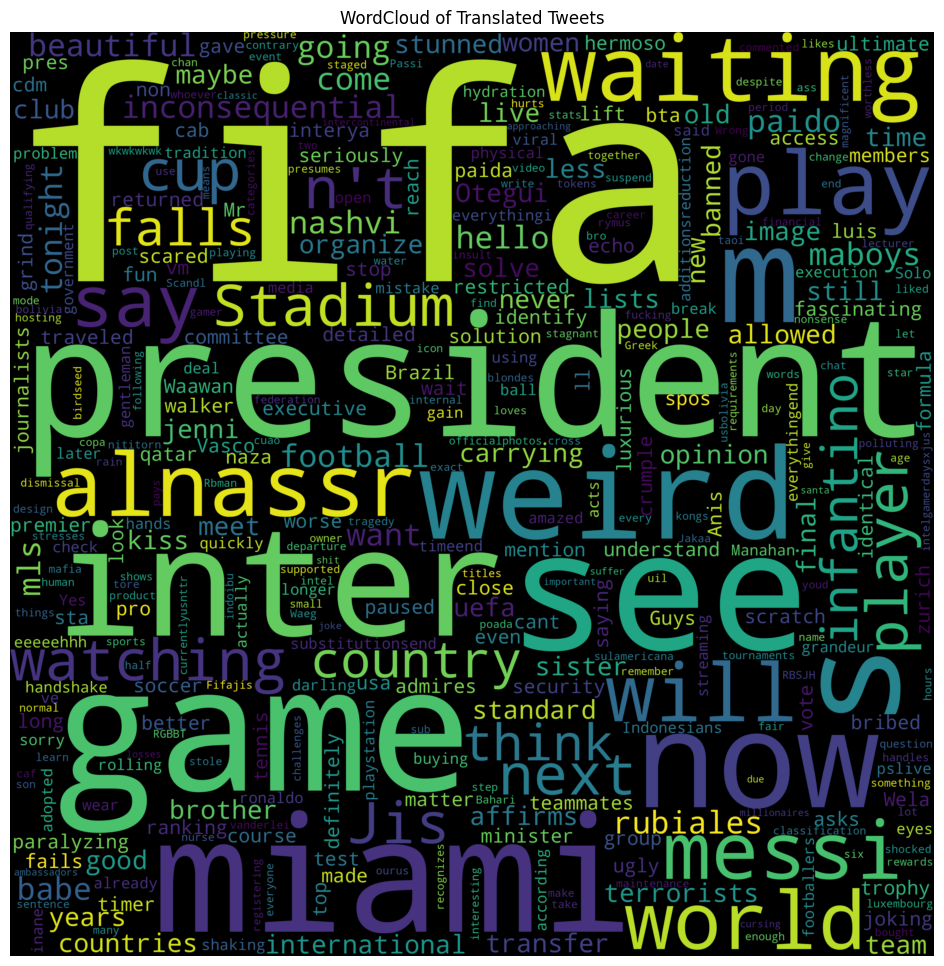

In [ ]:
# Wordcloud
plt.figure(figsize = (20,12))

fre_words= WordCloud(max_words=1000, height=4000, width=4000,
                     collocations = False).generate(cln_twt)
plt.imshow(fre_words, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Translated Tweets")
plt.show()

In [ ]:
tx_blb = TextBlob(cln_twt)
print(tx_blb)

Guys , what are you doing with Vasco ? Of course , the club has to stop FIFA from paralyzing Brazil . Wela falls years old because the walker fails , asks me to lift it , echo a paida fifa pro fifa president who see inter game miami weird waiting for him alnassr game now This test could have been less long so I gave up seriously , I was never scared of having to identify all the few countries on FIFA that have more countries than on fifa president traveled to zurich miami to see interya understand why we say that we say fascinating detailed solution how qatar bribed members of fifa 's executive committee to soccer vm cant wait sta ultimate team grind matter fifa fun look at it minister security cab watching tennis usa our reach for all this brother because in the uefa trophy of non-journalists who vote the old formula has returned with a restricted group top country fifa ranking It was good but made better just think about those who have been pres uefa for years not to mention the mayb

In [ ]:
ndf = pd.DataFrame()
ndf['ctweet'] = translated_df['ttweets'].map(lambda x:CleaningData(x))

In [ ]:
ndf

,ctweet
0,guys vasco course club stop fifa paralyzing brazil
1,wela falls years old walker fails asks lift echo paida fifa pro
2,fifa president see inter game miami weird waiting alnassr game
3,test could less long gave seriously never scared identify countries fifa countries
4,fifa president traveled zurich miami see interya understand say say
5,fascinating detailed solution qatar bribed members fifa executive committee soccer
6,cant wait sta ultimate team grind matter fifa fun
7,look minister security cab watching tennis usa reach brother
8,uefa trophy non journalists vote old formula returned restricted group top country fifa ranking
9,good made better


In [ ]:
ndf['polarity'] = ndf.ctweet.apply(lambda x: TextBlob(x).polarity)
ndf['subjectivity'] = ndf.ctweet.apply(lambda x: TextBlob(x).subjectivity)


In [ ]:
ndf

,ctweet,polarity,subjectivity
0,guys vasco course club stop fifa paralyzing brazil,0.000000,0.000000
1,wela falls years old walker fails asks lift echo paida fifa pro,-0.200000,0.250000
2,fifa president see inter game miami weird waiting alnassr game,-0.433333,0.600000
3,test could less long gave seriously never scared identify countries fifa countries,-0.016667,0.377778
4,fifa president traveled zurich miami see interya understand say say,0.000000,0.000000
5,fascinating detailed solution qatar bribed members fifa executive committee soccer,0.550000,0.800000
6,cant wait sta ultimate team grind matter fifa fun,0.150000,0.600000
7,look minister security cab watching tennis usa reach brother,0.000000,0.000000
8,uefa trophy non journalists vote old formula returned restricted group top country fifa ranking,0.300000,0.350000
9,good made better,0.600000,0.550000


In [ ]:
ndf['sentiments'] = np.where(ndf.polarity > 0, 'positive', np.where(ndf.polarity < 0, 'negative', 'neutral'))
ndf.head()

,ctweet,polarity,subjectivity,sentiments
0,guys vasco course club stop fifa paralyzing brazil,0.000000,0.000000,neutral
1,wela falls years old walker fails asks lift echo paida fifa pro,-0.200000,0.250000,negative
2,fifa president see inter game miami weird waiting alnassr game,-0.433333,0.600000,negative
3,test could less long gave seriously never scared identify countries fifa countries,-0.016667,0.377778,negative
4,fifa president traveled zurich miami see interya understand say say,0.000000,0.000000,neutral


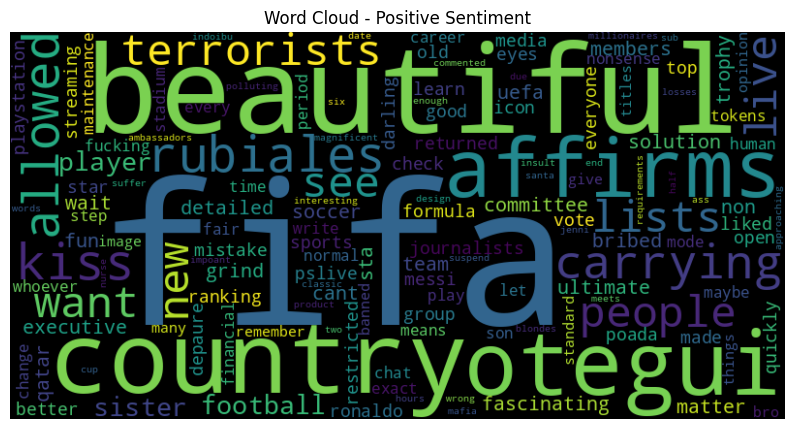

In [ ]:


# Positive sentiment word cloud
positive_tweets = ndf[ndf['sentiments'] == 'positive']['ctweet']
positive_text = ' '.join(positive_tweets)

plt.figure(figsize=(10, 6))
positive_wordcloud = WordCloud(width=800, height=400).generate(positive_text)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()


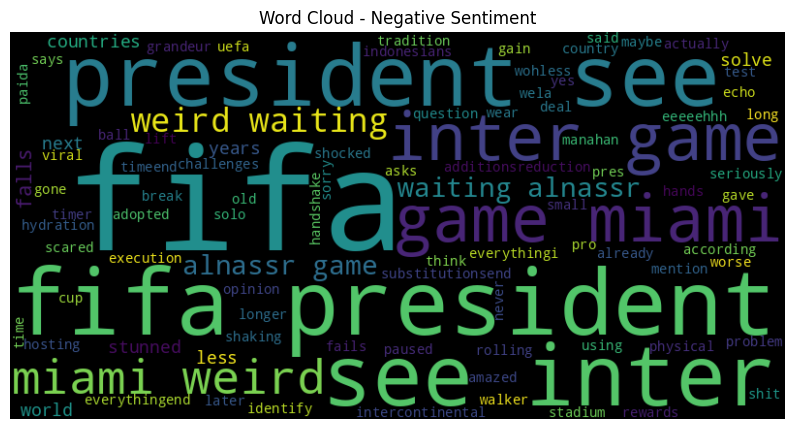

In [ ]:

# Negative sentiment word cloud
negative_tweets = ndf[ndf['sentiments'] == 'negative']['ctweet']
negative_text = ' '.join(negative_tweets)

plt.figure(figsize=(10, 6))
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_text)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')
plt.show()


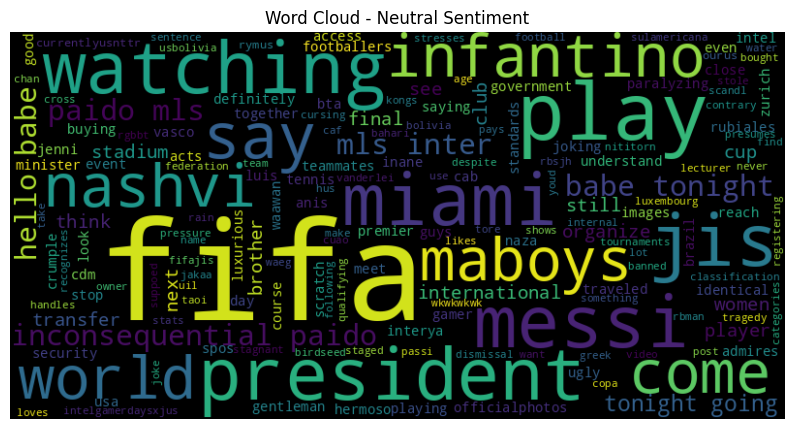

In [ ]:

# Neutral sentiment word cloud
neutral_tweets = ndf[ndf['sentiments'] == 'neutral']['ctweet']
neutral_text = ' '.join(neutral_tweets)

plt.figure(figsize=(10, 6))
neutral_wordcloud = WordCloud(width=800, height=400).generate(neutral_text)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Neutral Sentiment')
plt.show()


In [ ]:
ndf.sentiments.value_counts()

neutral     32
positive    17
negative    14
Name: sentiments, dtype: int64

In [ ]:
lbls = ['Positive [' + str(ndf.sentiments.value_counts()[0]) + '%]',  'Neutral [' + str(ndf.sentiments.value_counts()[1]) + '%]',
          'Negative [' + str(ndf.sentiments.value_counts()[2]) + '%]']

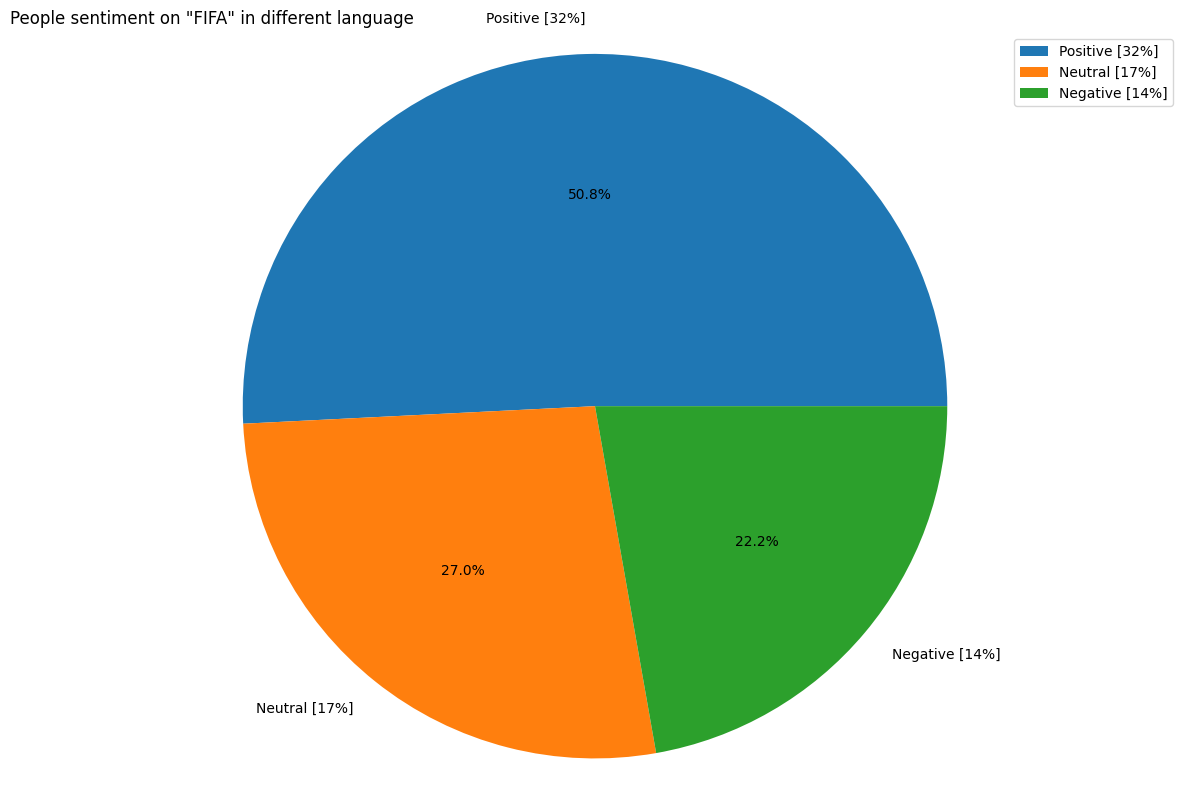

In [ ]:
# People sentiment piechart
plt.figure(figsize=(12,8))
plt.pie(ndf.sentiments.value_counts(), autopct='%1.1f%%', labels = lbls)
plt.legend(lbls, loc="best")
plt.title('People sentiment on "FIFA" in different language', loc= 'left')
plt.axis('equal')
plt.tight_layout()
plt.show()



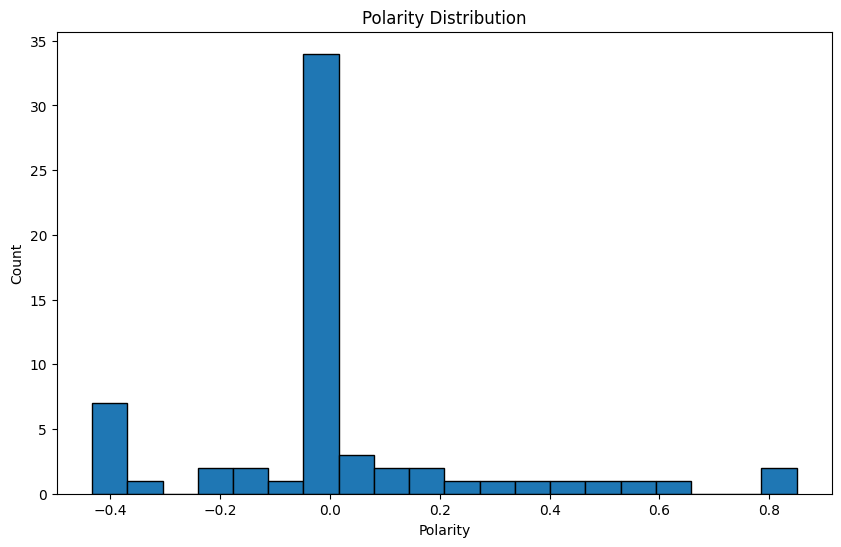

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(ndf['polarity'], bins=20, edgecolor='black')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()


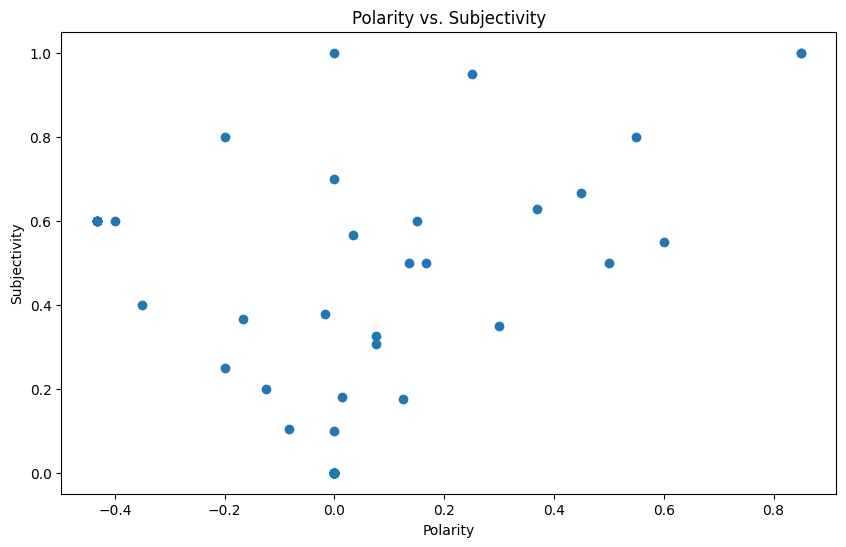

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ndf['polarity'], ndf['subjectivity'])
plt.title('Polarity vs. Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


## Modeling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
label_encoder = LabelEncoder()
ndf['sentiment_encoded'] = label_encoder.fit_transform(ndf['sentiments'])

In [ ]:
ndf.head()

,ctweet,polarity,subjectivity,sentiments,sentiment_encoded
0,guys vasco course club stop fifa paralyzing brazil,0.000000,0.000000,neutral,1
1,wela falls years old walker fails asks lift echo paida fifa pro,-0.200000,0.250000,negative,0
2,fifa president see inter game miami weird waiting alnassr game,-0.433333,0.600000,negative,0
3,test could less long gave seriously never scared identify countries fifa countries,-0.016667,0.377778,negative,0
4,fifa president traveled zurich miami see interya understand say say,0.000000,0.000000,neutral,1


In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Convert text data to numerical form using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_text = tfidf.fit_transform(ndf['ctweet']).toarray()

y = ndf['sentiment_encoded']

# Use SMOTE to oversample
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_text, y)

1    32
0    32
2    32
Name: sentiment_encoded, dtype: int64


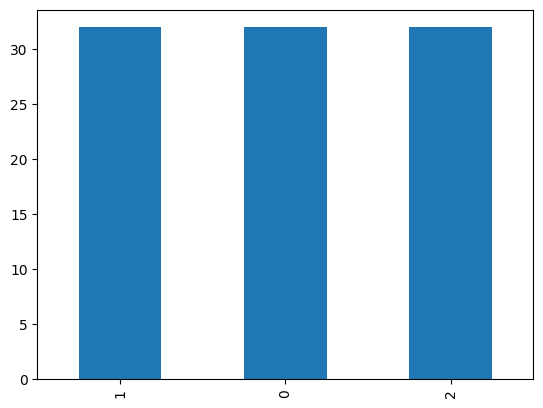

In [ ]:
# Create a DataFrame from the resampled data
resampled_data = pd.DataFrame(y_resampled, columns=['sentiment_encoded'])

# Count the number of occurrences of each class
class_distribution_resampled = resampled_data['sentiment_encoded'].value_counts()

print(class_distribution_resampled)

# Visualize the distribution
class_distribution_resampled.plot(kind='bar')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_resampled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # Assuming you want to find 3 clusters
clusters = kmeans.fit_predict(X_standardized)

# If you'd like to evaluate the quality of the clustering
silhouette_avg = silhouette_score(X_standardized, clusters)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.36608422987848116


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X = ndf['ctweet']
y = ndf['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [ ]:
rfc_predictions = rfc.predict(X_test_tfidf)
rfc_report = classification_report(y_test, rfc_predictions)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         6
           2       1.00      0.20      0.33         5

    accuracy                           0.54        13
   macro avg       0.50      0.40      0.33        13
weighted avg       0.62      0.54      0.44        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm = SVC()
svm.fit(X_train_tfidf, y_train)

SVC()

In [ ]:
svm_predictions = svm.predict(X_test_tfidf)
svm_report = classification_report(y_test, svm_predictions)
print(svm_report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         6
           2       1.00      0.20      0.33         5

    accuracy                           0.54        13
   macro avg       0.50      0.40      0.33        13
weighted avg       0.62      0.54      0.44        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
lr_predictions = lr.predict(X_test_tfidf)
lr_report = classification_report(y_test, lr_predictions)
print(lr_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         6
           2       1.00      0.20      0.33         5

    accuracy                           0.54        13
   macro avg       0.50      0.40      0.33        13
weighted avg       0.62      0.54      0.44        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Vectorization (assuming you're using the cleaned tweets in 'ctweet' column)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(ndf['ctweet'])

# It's a good practice to scale data before clustering, especially for DBSCAN
X_scaled = StandardScaler(with_mean=False).fit_transform(X)

# Apply DBSCAN. Note: You may need to tune the 'eps' and 'min_samples' parameters based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)

# Attach labels to the DataFrame
ndf['dbscan_labels'] = dbscan.labels_

# Evaluate the clustering (Silhouette Score ranges from -1 to 1, with higher being better)
sil_score = silhouette_score(X, dbscan.labels_)

print(f"Silhouette Score: {sil_score}")

# Now, you can analyze the clusters in 'ndf'


Silhouette Score: 0.09197815217125069


In [ ]:
from sklearn.model_selection import KFold
from keras.models import clone_model
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam



# Tokenizing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(ndf['ctweet'])

# Get the word to index mapping
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(ndf['ctweet'])

# Padding
data = pad_sequences(sequences, maxlen=100)  # You can adjust "maxlen" based on the average length of your tweets



# Define the number of folds
n_folds = 7
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

accuracies = []



for train_index, val_index in kf.split(data):
    X_train_kf, X_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ndf['sentiment_encoded'].iloc[train_index], ndf['sentiment_encoded'].iloc[val_index]

    # Use the same model architecture as before
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=100))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))  # Assuming 3 classes: positive, negative, neutral

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_kf, y_train_kf, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the validation data
    _, accuracy = model.evaluate(X_val_kf, y_val_kf, verbose=0)
    accuracies.append(accuracy)

# Aggregate results
avg_accuracy = sum(accuracies) / len(accuracies)
print(f"Average accuracy over {n_folds}-fold cross-validation: {avg_accuracy*100:.2f}%")


Average accuracy over 7-fold cross-validation: 50.79%
